# THE SPARKS FOUNDATION

## Author :- Simran Asad Pirjade

## Task 1 :- Prediction using Supervised ML

### Problem Statement :-
* To predict the percentage of marks that a student is expected score based upon the number of hours they studied.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"C:\Machine Learning\Datasets\Study Hours.csv")
data.sample(5)                 # Load the dataset

,Hours,Scores
1,5.1,47
22,3.8,35
7,5.5,60
14,1.1,17
24,7.8,86


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* The Data is Cleaned.

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

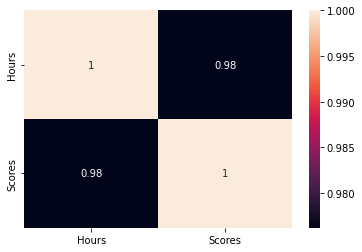

In [7]:
sns.heatmap(data.corr(),annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x252c9bb88b0>,
 'caps': [<matplotlib.lines.Line2D at 0x252c9bb8f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x252c9bb85e0>],
 'medians': [<matplotlib.lines.Line2D at 0x252c9bce430>],
 'fliers': [<matplotlib.lines.Line2D at 0x252c9bce700>],
 'means': []}

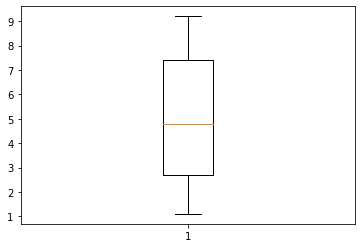

In [8]:
plt.boxplot(data['Hours'])

* Tha Data Free from the Outliers.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Hours', ylabel='Density'>

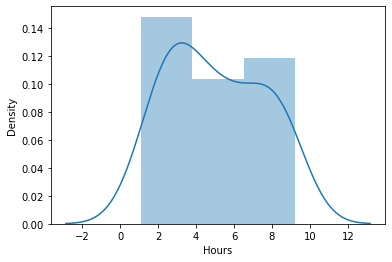

In [9]:
sns.distplot(data['Hours'])

<function matplotlib.pyplot.show(close=None, block=None)>

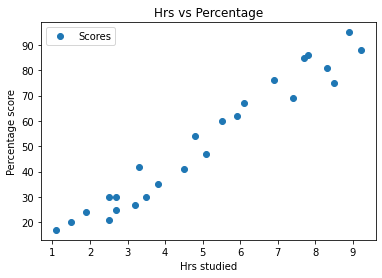

In [10]:
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hrs vs Percentage')
plt.xlabel('Hrs studied')
plt.ylabel('Percentage score')
plt.show

* From the graph above, We can see the Study of Hours increases then also Percentage increases. 

In [11]:
x=data.iloc[:,:-1]     # Divide Th Data into Independent(x) and Dependent(y) variables
y=data.iloc[:,-1]

In [12]:
# Splitting the Data into Train and Test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
r=LinearRegression()
r.fit(x_train,y_train)

LinearRegression()

In [15]:
r.coef_

array([9.91065648])

In [16]:
r.intercept_

2.018160041434683

In [17]:
y_pred=r.predict(x_test)

In [18]:
# Comparing Actual values and Predicted values
comparision=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparision

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [19]:
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
sc=r2_score(y_pred,y_test)
sc

0.9546785947197246

In [21]:
print(np.sqrt(mean_squared_error(y_test,y_pred)))

4.6474476121003665


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Scores'>

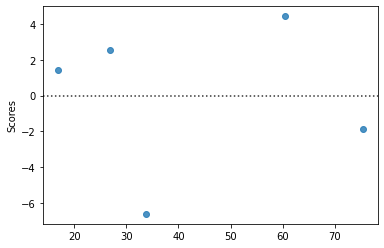

In [22]:
sns.residplot(y_pred,y_test)

In [23]:
err=y_test-y_pred

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

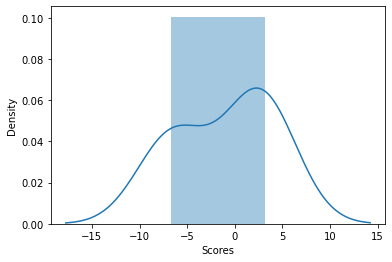

In [24]:
sns.distplot(err)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hours', ylabel='Scores'>

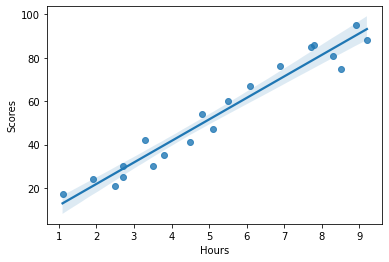

In [25]:
sns.regplot(x_train,y_train)

So, we can predict score of student with 95% accuracy if we know for how much hours he studied.